In [280]:
import pandas
import numpy as np

from clean import *

df_players_teams = pandas.read_csv("dataset/players_teams.csv")

df_players_teams = clean_teams_players(df_players_teams)

df_players_teams.head()

df_players= pandas.read_csv("dataset/players.csv")

df_players = clean_players(df_players)

df_merged = merge_player_info(df_players, df_players_teams) 




In [281]:
df_pred = player_rankings(df_merged) # TODO: to remove year 10 add parameter 9

#sort by player rankings
df_pred = df_pred.sort_values(by=['predictions'], ascending=False)

df_pred.head(10)

,playerID,medium,predictions
464,tauradi01w,3.357231,3.336905
275,leslili01w,3.303227,3.294452
86,catchta01w,3.170157,3.164172
368,parkeca01w,2.888040,2.885868
228,jacksla01w,2.698630,2.707898
379,pondeca01w,2.622344,2.642727
548,youngso01w,2.315050,2.360242
35,beardal01w,2.199414,2.206995
434,smithka01w,2.208483,2.196639
475,thompti01w,2.129342,2.120975


,year,playerID,medium,predictions
0,1,leslili01w,0.013213,0.013224
1,2,leslili01w,1.135124,1.135086
2,3,leslili01w,0.432967,0.432952
3,4,leslili01w,-0.196197,-0.196188
4,5,leslili01w,0.067255,0.067256


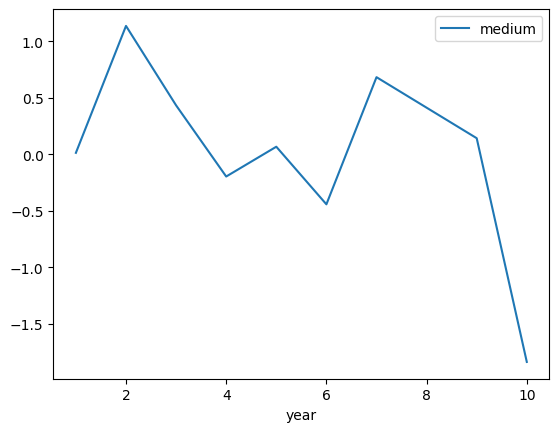

In [282]:
#
#
# NOTE: PREDICTION IS NOT WORKING properly for now, so we use medium ranking
#
#

df_player_evol = player_ranking_evolution(df_merged, 'leslili01w')

# plot of the evolution
df_player_evol.plot(x='year', y='medium', kind='line')
df_player_evol.head()


,year,playerID,medium,predictions
0,5,tauradi01w,-0.685528,-0.685510
1,6,tauradi01w,-0.888309,-0.888285
2,7,tauradi01w,-0.139748,-0.139744
3,8,tauradi01w,0.523516,0.523502
4,9,tauradi01w,0.193683,0.193677


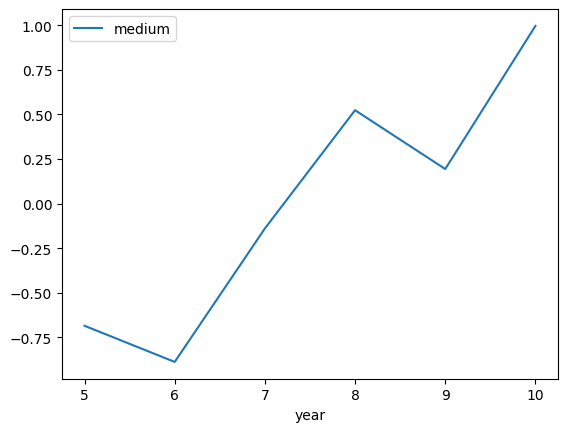

In [283]:
df_player_evol = player_ranking_evolution(df_merged, 'tauradi01w')

# plot of the evolution
df_player_evol.plot(x='year', y='medium', kind='line')
df_player_evol.head()

In [284]:
# get the players in a team 

df_player_of_teams = merge_player_info(df_players, df_players_teams) 

df_players_teams = player_in_team_by_year(df_player_of_teams)

df_players_teams = team_mean(df_players_teams, df_pred)

df_players_teams.head(20)


,tmID,year,playerID,mean
0,ATL,9,"[balesal01w, castriz01w, desouer01w, haynikr01...",0.351334
1,ATL,10,"[castriz01w, desouer01w, holdsch01w, lacyje01w...",0.826248
2,CHA,1,"[bauerca01w, brazian01w, enissh01w, erbsu01w, ...",0.093191
3,CHA,2,"[anderke01w, bristre01w, edwarto01w, enissh01w...",0.477468
4,CHA,3,"[anderke01w, edwarto01w, enissh01w, erbsu01w, ...",0.486543
5,CHA,4,"[brownru01w, brumfma01w, enissh01w, feastal01w...",0.562497
6,CHA,5,"[andrame01w, bjorkte01w, feastal01w, frettla01...",0.693443
7,CHA,6,"[darlihe01w, feastal01w, goodsad01w, lewisty01...",0.935910
8,CHA,7,"[bondla01w, currimo01w, darlihe01w, feastal01w...",0.635682
9,CHI,7,"[brownco01w, cronika01w, dalesst01w, dupreca01...",0.480043


Best teams in the 10 year history of the sport ...

In [285]:
df_players_teams = df_players_teams.sort_values(by=['mean'], ascending=False)
df_players_teams.head(10)

,tmID,year,playerID,mean
33,DET,10,"[bakersh01w, braxtka01w, davista02w, deforan01...",1.381849
62,LAS,10,"[bobbish01w, ferdima01w, harrokr01w, haydeva01...",1.230186
32,DET,9,"[braxtka01w, fordch01w, givench01w, hornbal01w...",1.202799
61,LAS,9,"[bobbish01w, brownki01w, dydekma01w, ferdima01...",1.067828
29,DET,6,"[braxtka01w, cashsw01w, farriba01w, fordch01w,...",1.064808
98,PHO,10,"[bonnede01w, johnste01w, mazzake01w, ohldeni01...",1.016970
39,HOU,6,"[arcaija01w, brownki01w, cantydo01w, goodsad01...",0.991045
52,IND,10,"[beviltu01w, catchta01w, davenje01w, dixonta01...",0.987661
31,DET,8,"[braxtka01w, cashsw01w, fordch01w, johnssh01w,...",0.941257
74,MIN,9,"[anosini01w, augusse01w, deforan01w, hardili01...",0.939560


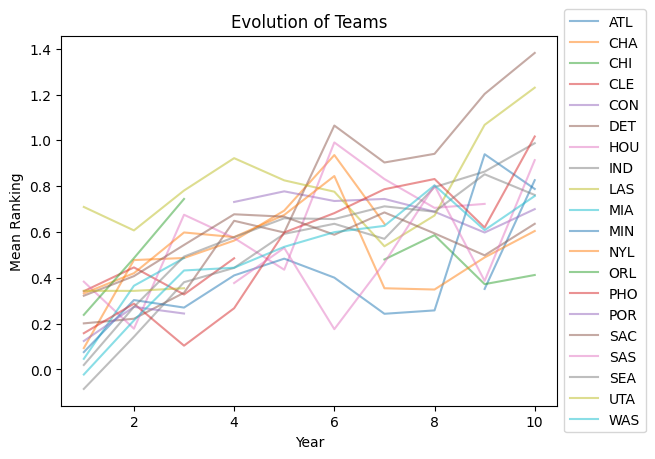

tmID,ATL,CHA,CHI,CLE,CON,DET,HOU,IND,LAS,MIA,MIN,NYL,ORL,PHO,POR,SAC,SAS,SEA,UTA,WAS
year,,,,,,,,,,,,,,,,,,,,
1,NaN,0.093191,NaN,0.341488,NaN,0.201037,0.383152,-0.085120,0.709345,0.046218,0.075606,0.331862,0.238295,0.158108,0.124045,0.321757,NaN,0.019462,0.343094,-0.022291
2,NaN,0.477468,NaN,0.445473,NaN,0.221309,0.177814,0.142598,0.606967,0.365239,0.302884,0.420073,0.485729,0.287071,0.273136,0.407331,NaN,0.273071,0.342952,0.213981
3,NaN,0.486543,NaN,0.327079,NaN,0.334808,0.675295,0.380815,0.781110,0.486293,0.270023,0.597966,0.744301,0.103757,0.244032,0.543405,NaN,0.492616,0.354448,0.432008
4,NaN,0.562497,NaN,0.485218,0.731125,0.648913,0.573760,0.443262,0.922376,NaN,0.410479,0.577743,NaN,0.267114,NaN,0.677389,0.377156,0.577480,NaN,0.444060
5,NaN,0.693443,NaN,NaN,0.777520,0.597636,0.435325,0.591947,0.825468,NaN,0.483581,0.674489,NaN,0.597826,NaN,0.666842,0.530686,0.659945,NaN,0.535182
6,NaN,0.935910,NaN,NaN,0.735304,1.064808,0.991045,0.635856,0.775982,NaN,0.400799,0.844382,NaN,0.682419,NaN,0.588054,0.175716,0.656509,NaN,0.599307
7,NaN,0.635682,0.480043,NaN,0.744326,0.903458,0.831129,0.570160,0.537657,NaN,0.242940,0.354385,NaN,0.786737,NaN,0.685476,0.465765,0.712084,NaN,0.626769
8,NaN,NaN,0.586082,NaN,0.688450,0.941257,0.705317,0.795887,0.672054,NaN,0.257711,0.348863,NaN,0.831371,NaN,0.593949,0.802576,0.688589,NaN,0.803906
9,0.351334,NaN,0.372332,NaN,0.597741,1.202799,0.722723,0.863698,1.067828,NaN,0.939560,0.488910,NaN,0.619530,NaN,0.498172,0.386612,0.851966,NaN,0.608223


In [286]:
import matplotlib.pyplot as plt

# Group the data by tmID and year and count the number of unique playerIDs for each group
df_teams_evolution = df_players_teams.groupby(['tmID', 'year']).agg({
    'mean': 'mean'
}).reset_index()


# Pivot the data to have tmID as columns and year as index
df_teams_evolution = df_teams_evolution.pivot(index='year', columns='tmID', values='mean')
#
## Plot the data as a stacked area chart
df_teams_evolution.plot(kind='line', stacked=False, alpha=0.5)

# Set the title and axis labels
plt.title('Evolution of Teams')
plt.xlabel('Year')
plt.ylabel('Mean Ranking')

plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

# Show the plot
plt.show()

df_teams_evolution.head(10)

# NOTA: as primeiras epocas tem menos pontuação porque tem ...
# jogadores com rankings que n são tão precisos. Uma vez que jogaram menos jogos
# TODO: podemos calcular os rankings progressivamente para um grafico mais preciso

By using the 10th year team squad we can come up with a mean team rating. 

In [287]:
#get the teams rating for year 10 
# NOTE: I AM USING YEAR 10 ON THE PLAYER CALCULATION ... we have to take it out
year_10 = df_players_teams[df_players_teams['year'] == 10]

year_10 = year_10.sort_values(by=['mean'], ascending=False)

year_10.head(20)

,tmID,year,playerID,mean
33,DET,10,"[bakersh01w, braxtka01w, davista02w, deforan01...",1.381849
62,LAS,10,"[bobbish01w, ferdima01w, harrokr01w, haydeva01...",1.230186
98,PHO,10,"[bonnede01w, johnste01w, mazzake01w, ohldeni01...",1.016970
52,IND,10,"[beviltu01w, catchta01w, davenje01w, dixonta01...",0.987661
118,SAS,10,"[darlihe01w, frazeme01w, hammobe01w, johnsvi01...",0.913780
1,ATL,10,"[castriz01w, desouer01w, holdsch01w, lacyje01w...",0.826248
75,MIN,10,"[anosini01w, augusse01w, hodgero01w, holliqu01...",0.787948
128,SEA,10,"[atkinla01w, batkosu01w, birdsu01w, burseja01w...",0.761697
141,WAS,10,"[ajavoma01w, beardal01w, blueni01w, colemma01w...",0.757231
23,CON,10,"[blackch01w, brownki01w, cironkr01w, ervinla01...",0.699871


Note, that the past year results can be misleading to the team strength calculation. Take as an example the ATL team that in year 9 (the first season in which they played in the league) they had a weak team, but in year 10 they had a stronger team.

In [288]:
year_10 = df_players_teams[df_players_teams['year'] == 10]

except_year_10 = df_players_teams[df_players_teams['year'] != 10]

except_year_10 = except_year_10.groupby(['tmID']).agg({
    'mean': 'mean',
    })

# EQUIPAS QUE MUDARAM DE ESTADO : UTA->SAS (epoca 4) e ORL/CON (epoca 4) TODO
# ... ver se n me esqueci de ng

except_year_10 = except_year_10.sort_values(by=['mean'], ascending=False)


except_year_10.head(50)

,mean
tmID,
LAS,0.766532
CON,0.712411
DET,0.679558
HOU,0.610618
CHA,0.554962
SAC,0.553597
SEA,0.547969
NYL,0.515408
ORL,0.489442
